# 向量與物件（Vectors and Objects）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 向量

### 二維向量
一個向量記錄了方向以及距離  
它是一個把物體移動的過程

在二維平面中  
$(a,b)$ 可以代表一個點  
也可以代表一個向量  
這個向量可以把物體從 $(0,0)$ 移動到 $(a,b)$  
所以這向量的長度（或是距離）為 $a^2+b^2$

在 Sage 裡  
可以用 `vector([a,b])` 來建造一個向量 $(a,b)$

In [1]:
v1 = vector([2,3])

函數 `f` 的 `f.plot()` 會把函數繪製出來  
向量 `v` 的 `v.plot()` 同樣會把向量繪製出來  

不同類型的物件會畫出不同東西

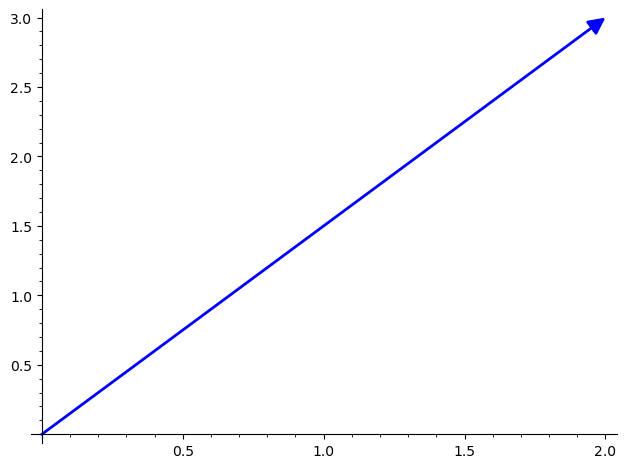

In [2]:
v1.plot()

我們只在意向量的方向及距離  
並不在意它的起始點在哪邊  

所以下方的藍向量與紅向量是被視為一樣的

可以用 `start` 參數  
來調整繪製時的起始點

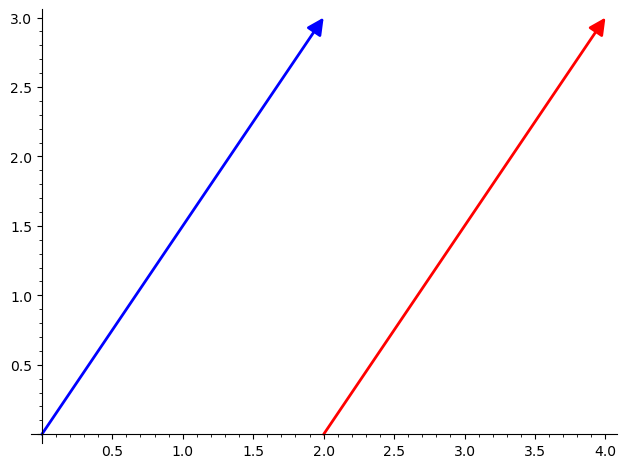

In [3]:
v1 = vector([2,3])
pic1 = v1.plot(color='blue')
pic2 = v1.plot(start=(2,0), color='red')
pic1 + pic2

向量有**向量加法**：  
向量加向量就是把各項相加  
$(a,b)+(c,d)=(a+c,b+d)$

In [4]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v3 = v1 + v2
v3

(1, 2)

意思是  
把一點從原點用 $(a,b)$ 向量移動  
再用 $(c,d)$ 向量移動  

相當於直接用 $(a+c,b+d)$ 來移動

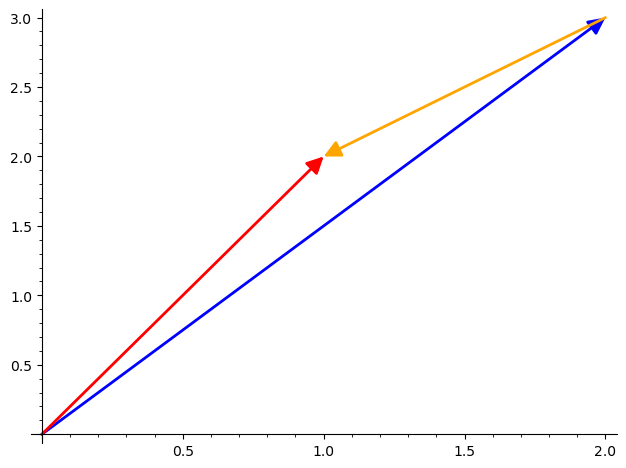

In [5]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v3 = v1 + v2
pic1 = v1.plot(color='blue')
pic2 = v2.plot(color='orange', start=v1)
pic3 = v3.plot(color='red')
pic1 + pic2 + pic3

向量有**純量乘法**：  
純量和向量相乘就是把純量乘進每一項    
$k\times (a,b)=(ka,kb)$

In [6]:
v1 = vector([2,3])
3 * v1

(6, 9)

意思就是將這個向量伸縮 $k$ 倍

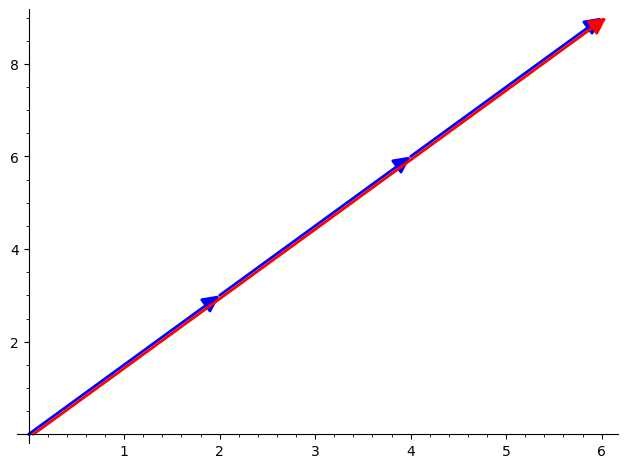

In [7]:
v1 = vector([2,3])
v2 = 3 * v1
pic1 = v1.plot()
pic2 = v1.plot(start=v1)
pic3 = v1.plot(start=v1+v1)
pic4 = v2.plot(start=(0.05,0),color='red')
pic1 + pic2 + pic3 + pic4

向量和向量之間可以做**內積**（dot product）  
得到一個純量  
$(a,b)\cdot (c,d) = ac+bd$

In [8]:
v1 = vector([2,3])
v2 = vector([-1,-1])
v1 * v2

-5

### 高維度向量
一個 $n$ 個數字的數對  
$(a_1, \ldots, a_n)$  
叫作一個 **$n$ 維向量**  

In [9]:
v1 = vector([1,2,3,4,5])

如同二維向量一般  
兩個高維度的向量可以**相加**  
$(a_1, \ldots, a_n) + (b_1, \ldots, b_n) = (a_1+b_1, \ldots, a_n+b_n)$

In [10]:
v1 = vector([1,2,3,4,5])
v2 = vector([5,4,3,2,1])
v1 + v2

(6, 6, 6, 6, 6)

純量和向量可以做**純量乘法**  
$k\times (a_1, \ldots, a_n)=(ka_1, \ldots, ka_n)$

In [11]:
v1 = vector([1,2,3,4,5])
3 * v1

(3, 6, 9, 12, 15)

向量和向量可以做**內積**  
得到一個純量  
$(a_1, \ldots, a_n)\cdot (b_1, \ldots, b_n) = a_1b_1 + \cdots + a_nb_n$

In [12]:
v1 = vector([1,2,3,4,5])
v2 = vector([5,4,3,2,1])
v1 * v2

35

## Python 中的物件
在 Python 裡  
我們可以創造出全新的東西  
然後定義它的許多性質及相關函數  
甚至定義它們的加法  
如何比大小  
如何顯示出來  

因為它是一個幾乎沒有侷限的東西  
所以我們叫它作**物件**

### 類別
Python 裡的物件有各自的**資料結構**（type）  
或是它屬於某一個**類別**（class）  

In [13]:
type(1)

<class 'sage.rings.integer.Integer'>

In [14]:
type(1.5)

<class 'sage.rings.real_mpfr.RealLiteral'>

In [15]:
type(x)

<class 'sage.symbolic.expression.Expression'>

In [16]:
type(range)

<class 'type'>

In [17]:
type(matrix([[1]]))

<class 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>

In [18]:
type(QQ)

<class 'sage.rings.rational_field.RationalField_with_category'>

In [19]:
type(exp)

<class 'sage.functions.log.Function_exp'>

物件可以是一個類別裡的**實例**（instance）  
可以用 `isinstance` 來判斷一個物件屬不屬於某一類別

In [20]:
isinstance(1,Integer)

True

In [21]:
isinstance(1,int)

False

In [22]:
isinstance(x,Expression)

True

### 自行定義一個類別
接下來  
我們試著在 Sage 中  
定義一個新的類別叫作 `fraction`  
來實現數學中的分數  

`class fraction`  
定義了類別的名稱

`__init__`  
定義了如何創造一個新物件

一個分數其實只須要兩個輸入的值：  
分子（numerator）和分母（denominator）  

每個物件都可以設定許多**屬性**（attribute）  
像這裡我們設定了 `numerator`、`denominator`、以及 `gcd`  

當 `q` 是一個物件  
`gcd` 是它的屬性  
可以用 `q.gcd` 叫出這個屬性的值

In [23]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
q = fraction(4,6)
q.gcd

2

每個物件也可以定義其相關的函數  
叫作**運算**（method）  

這裡我們定義一個新的運算  
計算分數的倒數（reciprocal）

In [24]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

q = fraction(2,3)
print('q')
print(q.numerator)
print(q.denominator)
print('---')

p = q.reciprocal();
print('1/q')
print(p.numerator)
print(p.denominator)

q
2
3
---
1/q
3
2


運算是函數  
所以最後要用 `()` 收尾  
或是放入一些須要的參數  

屬性只是一個值  
所以不用用 `()` 收尾

In [25]:
q.numerator()

TypeError: 'sage.rings.integer.Integer' object is not callable

In [26]:
q.reciprocal

<bound method fraction.reciprocal of <__main__.fraction object at 0x7f9c4a001300>>

這邊附帶提一下  
`_` 並不是什麼特殊的字元  
它可以拿來當變數的名字

In [27]:
for _ in range(10):
    print(_)

0
1
2
3
4
5
6
7
8
9


Python 中的類別有許多**特殊的運算**（special method）  
像是 `__init__`、`__repr__`、`__add__`、以及 `__contain__`

`__repr__` 告訴 Python  
如何把這個物件 `print` 出來  
（賦予 `print` 的意義）

In [28]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

q = fraction(2,3)
print(q)

2 / 3


`__add__` 告訴 Python  
如何將兩個物件相加  
（賦予 `+` 的意義）
 
類似的還有：  
`__sub__` 定義了減法 `-`  
`__mul__` 定義了乘法 `*`  
`__div__` 定義了除法 `/`  

In [29]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d )

q = fraction(2,3)
p = fraction(2,5)
print(p, '+', q, '=' , p+q)

2 / 5 + 2 / 3 = 16 / 15


`__eq__` 告訴 Python  
如何判斷兩個物件是否一樣  
（賦予 `==` 意義）

類似的還有  
`__ne__` 定義了不等於 `!=`

In [30]:
class fraction:
    def __init__(self,a,b):
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d)

    def __eq__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return a*d == b*c

q = fraction(2,3)
print(q)
p = fraction(4,6)
print(p)
print(p == q)

2 / 3
4 / 6
True


最後  
我們可以用 `dir`  
來查找所有的屬性及運算  

In [31]:
dir(q)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'denominator',
 'gcd',
 'numerator',
 'reciprocal']

或是用 `vars` 來列出所有的屬性

In [32]:
vars(q)

{'numerator': 2, 'denominator': 3, 'gcd': 1}

這樣我們的 `fraction` 已經很完整了  

然而我們可以留心一些小細節  
讓它更臻完美

比如說加入一些偵錯的機制  

若是分母可以為 0  
程式不見得會出錯  
然後結果不見得是我們要的  

In [33]:
q = fraction(2,0)
print(q)
p = fraction(3,0)
print(p)
print(p == q)

2 / 0
3 / 0
True


所以可以用 `raise Error` 來偵錯

不同的 `Error` 形式  
可以在 [Python 說明書](https://docs.python.org/3/library/exceptions.html)中找到

In [34]:
class fraction:
    def __init__(self,a,b):
        if b == 0:
            raise ValueError("The divisor cannot be zero.")
        self.numerator = a
        self.denominator = b
        self.gcd = gcd(a,b)
        
    def reciprocal(self):
        return fraction(self.denominator,self.numerator)

    def __repr__(self):
        return "{} / {}".format(self.numerator,self.denominator)

    def __add__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return fraction( a*d + b*c, b*d)

    def __eq__(self,other):
        a,b = self.numerator,self.denominator
        c,d = other.numerator,other.denominator
        return a*d == b*c

q = fraction(2,0)
print(q)

ValueError: The divisor cannot be zero.

## 動手試試看

##### 練習 1
若 $v_1 = (3,5)$ 且 $v_2 = (-2,-4)$。  
計算 $10 v_1 + 5 v_2$。

In [ ]:
### your answer here

##### 練習 2
若 $v_1 = (3,5)$ 且 $v_2 = (-2,-4)$。  
計算 $(10 v_1)\cdot(5 v_2)$。

In [ ]:
### your answer here

##### 練習 3

令 $a=1$, $b=2$, $c=3$, $d=4$  
定義一個函數 `linear_transformation(v)`  
使得輸入向量 $v=(x,y)$ 時  
輸出為向量 $(ax+by, cx+dy)$

In [ ]:
### your answer here

##### 練習 4
若 $v_1 = (1,1)$ , $v_2 = (-1,1)$  
且 $v_1' = (2,-1)$ , $v_2' = (1,2)$  

找出 $a,b,c,d$ 使得上一題中的`linear_transformation`  
符合以下性質：  
若 $(x,y) = v_1$，則回傳值為 $(x',y') = v_1'$  
若 $(x,y) = v_2$，則回傳值為 $(x',y') = v_2'$  

In [ ]:
### your answer here

##### 練習 5

如果我們有兩個向量，那麼我們就可以計算這兩個向量所張出的平行四邊形的面積  
例如 $v_1 = (1,0)$ , $v_2 = (0,1)$  
則此兩向量所張出的平行四邊形 $ABCD$ 為 $A(0,0),B(1,0),C(1,1),D(1,0)$  
且此平行四邊形的面積為 $1$  
有一個快速計算面積的方法
若 $v_1 = (x_1,y_1)$ 且 $v_2 = (x_2,y_2)$  
那麼 $v_1$ 和 $v_2$ 所張出的平行四邊形的面積就是 $|x_1y_2 - y_1x_2|$  

定義一個函數 `area` 其功能為：  
輸入兩個二維空間中向量 `v1` , `v2`  
回傳 `v1` 和 `v2` 所張出的平行四邊形的面積  

In [ ]:
### your answer here

##### 練習 6
Python 在定義類別的時候還有許多特殊運算：  
`__le__` 定義小於等於 `<=`、  
`__lt__` 定義小於 `<`、  
`__ge__` 定義大於等於 `>=`、  
`__gt__` 定義大於 `>`。  

將這些特殊運算補到我們先前所定義的 `fraction` 之中。

In [ ]:
### your answer here

##### 練習 7

定義一個新的類別 `clock_time`：  
輸入時可以放入一個整數 `n`，  
`print` 的時候會印出 1 到 12 中  
和 `n` 差 12 的倍數的那個數字。  
並定義其加法為  
`clock_time(a) + clock_time(b) = clock_time(a+b)`。  

七點鐘再過八個小時會是幾點鐘？

In [ ]:
### your answer here

##### 練習 8

定義一個函數`change_length`其功能為：  
輸入一個向量`v`  
並回傳一個方向與`v` 相同且長度為`1`  

In [ ]:
### your answer here
def change_length(v):

##### 練習 9
定義一個類別`calories_game：`  
輸入時可以放入兩個列表 `L1` 及 `L2`  
其中 `L1` 代表一個隊伍中每人的跑步時間（小時）  
`L2` 代表一個隊伍中每人的散步時間（小時）  
已知慢跑一小時可消耗__400大卡__，散步一小時可消耗**150大卡** 。  
並在類別中定義一個整數 `cal` 儲存所有人的總卡路里消耗量，且 `print` 時印出總卡路里消耗量。  

定義以 `cal` 來比較兩個類別之間的 `<`， `>`，`==`

In [ ]:
### your answer here

##### 練習 10

給定三組隊伍的每人各自跑步，散步時間（小時）  

A隊：  
慢跑：`[0, 8, 1, 0, 7, 9, 10, 0, 1, 5, 4, 9, 10, 4, 6]`  
散步：`[6, 6, 5, 3, 7, 8, 10, 1, 8, 2, 6, 5, 9, 5, 7]`  

B隊：  
慢跑：`[1, 2, 0, 3, 4, 9, 10, 2, 7, 10, 0, 1, 4, 3, 8]`  
散步：`[8, 7, 2, 1, 0, 10, 4, 1, 2, 3, 3, 10, 4, 7, 7]`  

C隊：  
慢跑：`[7, 7, 5, 6, 0, 10, 8, 10, 4, 1, 8, 6, 6, 1, 2]`  
散步：`[5, 9, 10, 2, 9, 1, 7, 1, 0, 9, 3, 1, 5, 6, 9]`  

請使用上面製作的類別比較三隊的總卡路里消耗量。

In [ ]:
### your answer here